Section 2


>Sim 1

At step    0 logliklihood is -1460.0916
At step    1 logliklihood is -1920.5505
At step    2 logliklihood is -2224.6647
At step    3 logliklihood is -2464.5725
At step    4 logliklihood is -2616.3588
At step    5 logliklihood is -3037.2545
At step    6 logliklihood is -3080.1819
At step    7 logliklihood is -3157.9017
At step    8 logliklihood is -3366.2700
At step    9 logliklihood is -3572.4923
At step   10 logliklihood is -3758.5000
At step   11 logliklihood is -3966.9648
At step   12 logliklihood is -4104.2859
At step   13 logliklihood is -4153.9723
At step   14 logliklihood is -4214.6072
At step   15 logliklihood is -4392.1206
At step   16 logliklihood is -4489.4852
At step   17 logliklihood is -4589.8600
At step   18 logliklihood is -4992.9378
At step   19 logliklihood is -5139.5859
At step   20 logliklihood is -5232.2370
At step   21 logliklihood is -5336.4161
At step   22 logliklihood is -5452.9217
At step   23 logliklihood is -5583.4685
At step   24 logliklihood is -5730.0605


<ipython-input-9-4aaf0ce3ab24>:8: RuntimeWarning: divide by zero encountered in log
  lo =np.log(np.multiply(P, A) + np.multiply((1-P), (1-A)))
<ipython-input-9-4aaf0ce3ab24>:21: RuntimeWarning: invalid value encountered in true_divide
  gradient = np.sum(np.nan_to_num(np.divide(gradient, b),nan=0),axis=1)


At step   39 logliklihood is -6038.1717
At step   40 logliklihood is -5304.4245
At step   41 logliklihood is -4692.0135
At step   42 logliklihood is -4441.0275
At step   43 logliklihood is -4389.0077
At step   44 logliklihood is -4175.4517
At step   45 logliklihood is -4139.1653
At step   46 logliklihood is -4140.9945
At step   47 logliklihood is -4143.8440
At step   48 logliklihood is -4107.1175
At step   49 logliklihood is -4108.6218
At step   50 logliklihood is -4111.8598
At step   51 logliklihood is -4117.0929
At step   52 logliklihood is -4124.8219
At step   53 logliklihood is -4053.9784
At step   54 logliklihood is -3976.8767
At step   55 logliklihood is -3968.2687
At step   56 logliklihood is -3959.8353
At step   57 logliklihood is -3951.6024
At step   58 logliklihood is -3943.5969
At step   59 logliklihood is -3935.8480
At step   60 logliklihood is -3928.4970
At step   61 logliklihood is -3922.4395
At step   62 logliklihood is -3917.1538
At step   63 logliklihood is -3912.5580


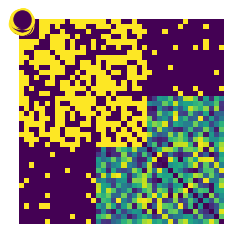

In [9]:
import networkx

import numpy as np

def log_likelihood(F, A):

  P = 1-np.exp(-np.matmul(F,F.T))
  lo =np.log(np.multiply(P, A) + np.multiply((1-P), (1-A)))
  lo[lo ==-np.inf] = 0

  log_likelihood = np.sum(lo)

  return log_likelihood


def gradient(F, A, i):
  gradient = np.multiply(-np.exp(-np.matmul(F[i], F.T)),F.T)
  gradient = np.multiply(gradient, (2*A[i]-1))
  b = np.multiply(np.exp(-np.matmul(F[i], F.T)),(1-2*A[i])) + A[i]
  #b = np.reciprocal(b)
  gradient = np.sum(np.nan_to_num(np.divide(gradient, b),nan=0),axis=1)

  return gradient

def train(A, C, iterations=200):
  # initialize an F
  N = A.shape[0]
  F = np.random.rand(N, C)
  for n in range(iterations):
    for person in range(N):
      grad = gradient(F, A, person)
      F[person] += 0.005 * grad  # updating F
      F[person] = np.maximum(0.001, F[person])  # F should be nonnegative
    ll = log_likelihood(F, A)
    print('At step %4i logliklihood is %5.4f' % (n, ll))
  return F


#################################

A=np.random.rand(40,40)
A[0:15,0:25]=A[0:15,0:25]>1- 0.6 # connection prob people with 1 common group
A[0:15,25:40]=A[0:15,25:40]>1-0.1 # connection prob people with no common group A[15:40,25:40]=A[15:40,25:40]>1-0.7 # connection prob people with 1 common group
A[15:25,15:25]=A[15:25,15:25]>1-0.8 # connection prob people with 2 common group for i in range(40):
for i in range(40):
    A[i,i]=0
    for j in range(i):
        A[i,j]=A[j,i]

import matplotlib.pyplot as plt
import networkx as nx
plt.imshow(A)
delta=np.sqrt(-np.log(1-0.1)) # epsilon=0.1 F=train(A, 2, iterations = 120)
F=train(A, 2, iterations=120)
print(F>delta)
G= networkx.from_numpy_array(A)
C=F>delta # groups members nx.draw(G,node_color=10*(C[:,0])+20*(C[:,1]))
nx.draw(G,node_color=10*(C[:,0])+20*(C[:,1]))
plt.show()


Section 3


>Sim 2

In [1]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import math

def generate_graph(k,n,z,p,q):
	out = np.array([([0]*n)]*n)
	np.fill_diagonal(out,1)
	for i in range(0,n):
		for j in range(0,i):
			if z[i] != z[j]:
				out[i][j] = np.random.binomial(1,q)
			else:
				out[i][j] = np.random.binomial(1,p)
			out[j][i] = out[i][j]

	return out
z = [3,3,3,3,1,1,2,2,3,2,2,2,1,1,1]
z1 =[1,1,1,1,1,2,2,2,2,2,3,3,3,3,3]
x = generate_graph(3,15,z,0.6,0.1)

>Sim 3

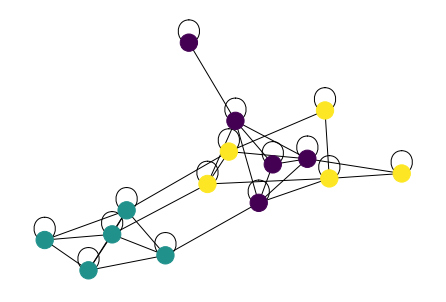

In [2]:
g = nx.from_numpy_array(x)
nx.draw(g, node_color=z)
plt.show()

>Sim 4

In [3]:
def hamming_calculator(z1,z2):
	return np.count_nonzero(z1!=z2)

>Sim 5

In [4]:
def min_hamming_calculator(z1,z2,k):
  print(z2)
  permus = list(itertools.permutations(list(range(1,k+1))))
  min_hamming = 9999999
  min_z2 = []
  for perm in permus:
    permuted = z2.copy()
    for i in range(0,len(permuted)):
      permuted[i] = perm[permuted[i]-1]
    x = np.count_nonzero(z1!=permuted)
    if(x < min_hamming):
      min_hamming = x
      min_z2 = permuted
  return min_hamming

>Sim 6

In [5]:
def log_likelihood(A, z,p,q,n):
	count = 0
	for i in range(0,n):
		for j in range(0,i):
			prob = q
			if(z[i] == z[j]):
				prob = p
			count += np.log((1-A[i][j])*(1-prob) + A[i][j]*prob)
	return -count

>Sim 7

In [6]:
def min_likelihood(A, z, p, q, n, T=100):
  zt = z.copy()
  best = []
  min_likelihood = 999999
  likelihoods = []
  hamming = []
  for k in range(0,T):
    for i in range(0,len(z)):
      for j in range(0, len(z)):
        new_z = zt.copy()
        new_z[i],new_z[j] = new_z[j], new_z[i] 
        likelihood = log_likelihood(A,new_z,p,q,n)
        #print(str(likelihood)+"\n")
        if(likelihood < min_likelihood):
          best = new_z
          min_likelihood = likelihood
    likelihoods.append(min_likelihood)
    min_likelihood = 9999999
    hamming.append(hamming_calculator(best,zt))
    zt = best 
  plt.plot(likelihoods)
  plt.plot(hamming)
  plt.show()
  return best
  


>Sim 8

In [7]:
def random_z(z,z1, count, A, p, q,n,k):
	print("z0 likelihood = %d\n"%(log_likelihood(A,z,p,q,n)))
	minimum = 999999
	minimum_vector = []
	out = []
	for i in range(0,count):
		new_z = z1.copy()
		random.shuffle(new_z)
		result = min_likelihood(A,new_z, p,q,n)
  
		out.append(result)
	for e in out:
		llh = log_likelihood(A,e,p,q,n)
		print(str(e)+ " : " + str(llh) + " : "+ str(min_hamming_calculator(e,z,k)) + "\n")
		if llh < minimum:
			minimum = llh
			minimum_vector = e
	return out,minimum,minimum_vector

z0 likelihood = 42



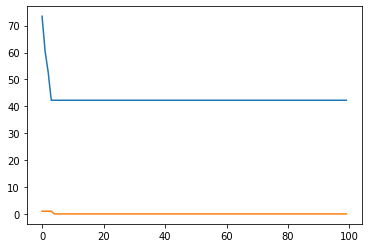

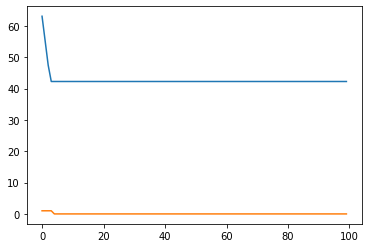

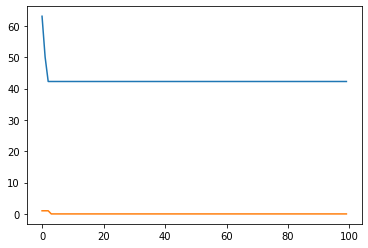

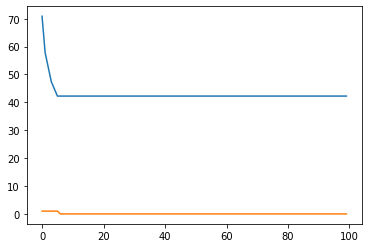

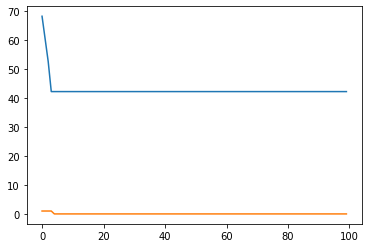

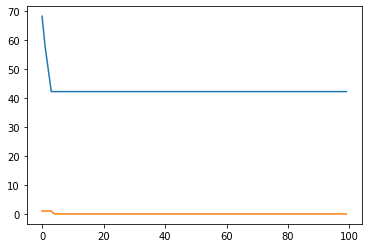

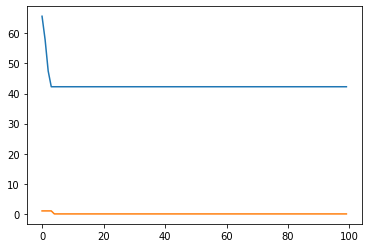

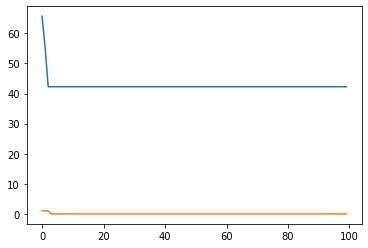

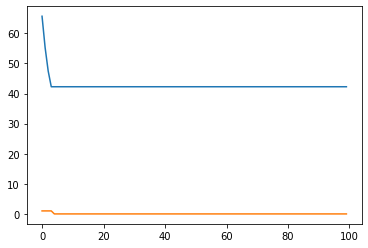

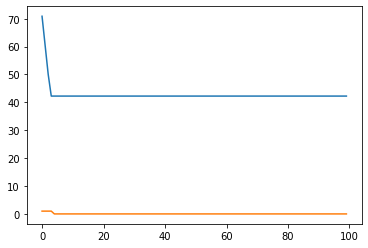

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1] : 42.25656540164371 : 0

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[3, 3, 3, 3, 2, 2, 1, 1, 3, 1, 1, 1, 2, 2, 2] : 42.25656540164371 : 0

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[2, 2, 2, 2, 1, 1, 3, 3, 2, 3, 3, 3, 1, 1, 1] : 42.25656540164371 : 0

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[2, 2, 2, 2, 1, 1, 3, 3, 2, 3, 3, 3, 1, 1, 1] : 42.25656540164371 : 0

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[1, 1, 1, 1, 2, 2, 3, 3, 1, 3, 3, 3, 2, 2, 2] : 42.25656540164371 : 0

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1] : 42.25656540164371 : 0

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1] : 42.25656540164371 : 0

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[1, 1, 1, 1, 3, 3, 2, 2, 1, 2, 2, 2, 3, 3, 3] : 42.25656540164371 : 0

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[2, 2, 2, 2, 1, 1,

In [8]:
z1 =[1,1,1,1,1,2,2,2,2,2,3,3,3,3,3]
vectors,value,min_vector = random_z(z,z1, 10, x, 0.6,0.1,15,3)

>Sim 9 & 10

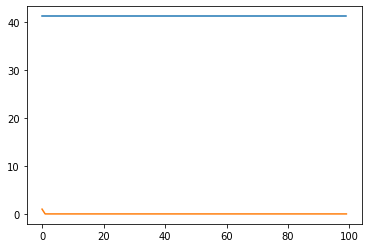

[3, 3, 3, 1, 1, 1, 2, 2, 3, 2, 2, 2, 3, 1, 1]


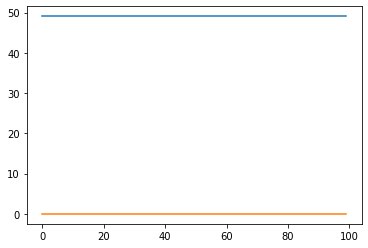

[3, 3, 3, 3, 2, 2, 2, 1, 3, 2, 1, 2, 1, 1, 1]
[3, 3, 3, 3, 2, 2, 2, 1, 3, 2, 1, 2, 1, 1, 1]
1


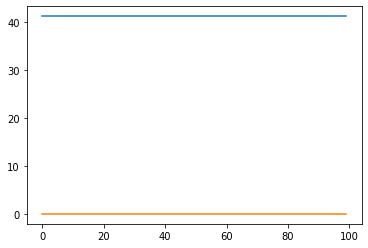

[3, 3, 3, 1, 1, 1, 2, 2, 3, 2, 2, 2, 3, 1, 1]
[3, 3, 3, 1, 1, 1, 2, 2, 3, 2, 2, 2, 3, 1, 1]
1


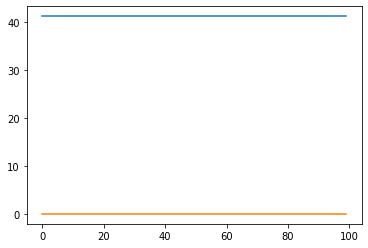

[2, 2, 2, 1, 1, 1, 3, 3, 2, 3, 3, 3, 2, 1, 1]
[2, 2, 2, 1, 1, 1, 3, 3, 2, 3, 3, 3, 2, 1, 1]
1


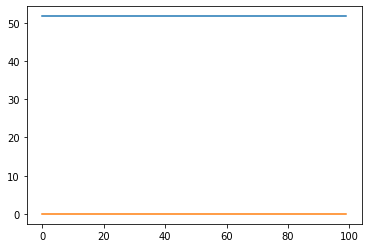

[2, 2, 2, 1, 1, 3, 2, 1, 2, 3, 3, 1, 1, 3, 3]
[2, 2, 2, 1, 1, 3, 2, 1, 2, 3, 3, 1, 1, 3, 3]
1


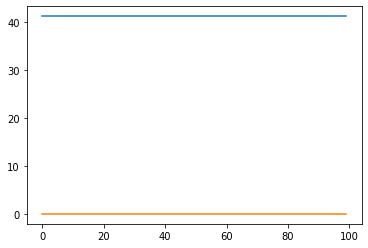

[2, 2, 2, 1, 1, 1, 3, 3, 2, 3, 3, 3, 2, 1, 1]
[2, 2, 2, 1, 1, 1, 3, 3, 2, 3, 3, 3, 2, 1, 1]
1


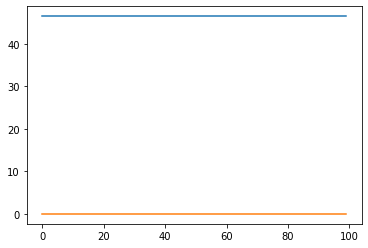

[2, 2, 2, 3, 3, 3, 1, 3, 2, 1, 3, 1, 2, 1, 1]
[2, 2, 2, 3, 3, 3, 1, 3, 2, 1, 3, 1, 2, 1, 1]
1


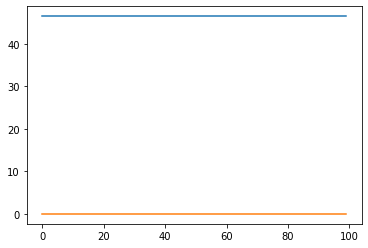

[3, 3, 3, 1, 1, 1, 3, 2, 3, 1, 1, 2, 2, 2, 2]
[3, 3, 3, 1, 1, 1, 3, 2, 3, 1, 1, 2, 2, 2, 2]
1


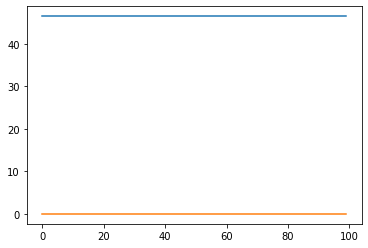

[3, 3, 3, 2, 2, 2, 3, 1, 3, 2, 2, 1, 1, 1, 1]
[3, 3, 3, 2, 2, 2, 3, 1, 3, 2, 2, 1, 1, 1, 1]
1


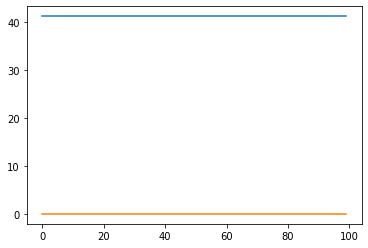

[3, 3, 3, 1, 1, 1, 2, 2, 3, 2, 2, 2, 3, 1, 1]
[3, 3, 3, 1, 1, 1, 2, 2, 3, 2, 2, 2, 3, 1, 1]
1


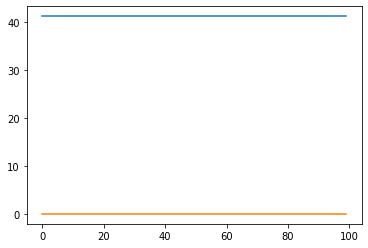

[3, 3, 3, 1, 1, 1, 2, 2, 3, 2, 2, 2, 3, 1, 1]
[3, 3, 3, 1, 1, 1, 2, 2, 3, 2, 2, 2, 3, 1, 1]
1


In [13]:
#vectors
print(min_likelihood(x,z,0.6,0.1,15))
for zp in vectors:
  print(zp)
  print(min_likelihood(x, zp, 0.6, 0.1, 15))
  print(min_hamming_calculator(z,zp,3))

>Sim 11

z0 likelihood = 41



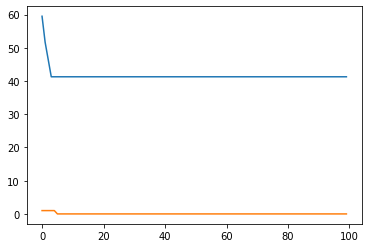

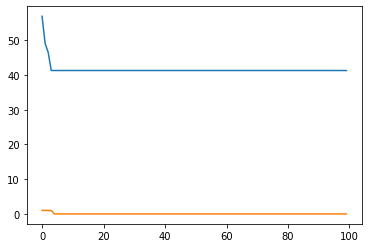

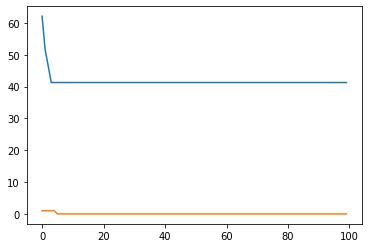

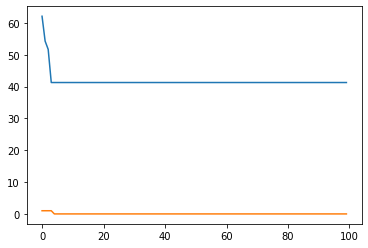

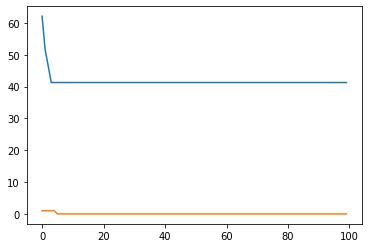

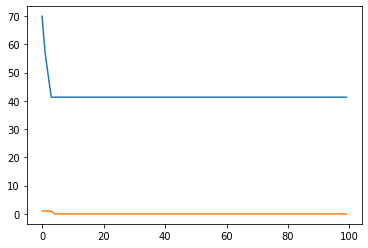

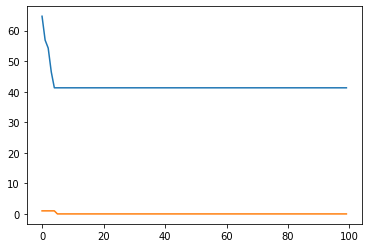

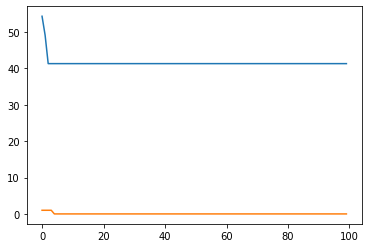

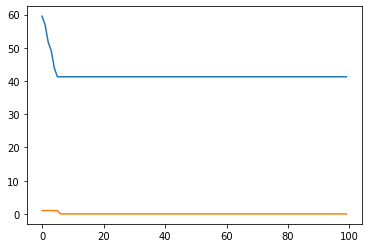

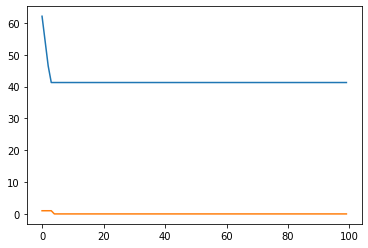

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[2, 1, 2, 2, 3, 3, 1, 1, 2, 2, 1, 1, 3, 3, 3] : 41.27573614863198 : 1

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[1, 1, 2, 1, 3, 3, 2, 2, 1, 1, 2, 2, 3, 3, 3] : 41.27573614863198 : 1

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[3, 2, 3, 3, 1, 1, 2, 2, 3, 3, 2, 2, 1, 1, 1] : 41.27573614863198 : 1

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[2, 3, 2, 2, 1, 1, 3, 3, 2, 2, 3, 3, 1, 1, 1] : 41.27573614863198 : 1

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[2, 3, 2, 2, 1, 1, 3, 3, 2, 2, 3, 3, 1, 1, 1] : 41.27573614863198 : 1

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[3, 3, 1, 3, 2, 2, 1, 1, 3, 3, 1, 1, 2, 2, 2] : 41.27573614863198 : 1

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[2, 3, 2, 2, 1, 1, 3, 3, 2, 2, 3, 3, 1, 1, 1] : 41.27573614863198 : 1

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[2, 1, 2, 2, 3, 3, 1, 1, 2, 2, 1, 1, 3, 3, 3] : 41.27573614863198 : 1

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[2, 1, 2, 2, 3, 3,

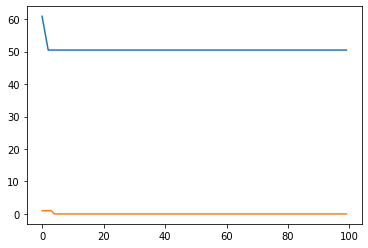

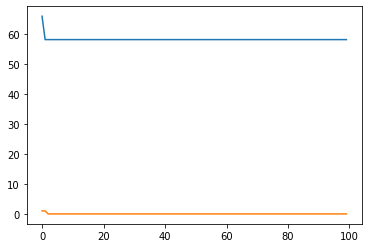

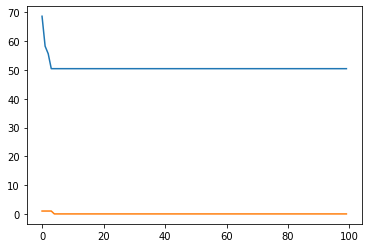

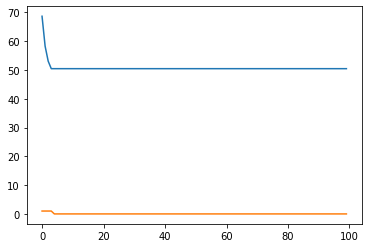

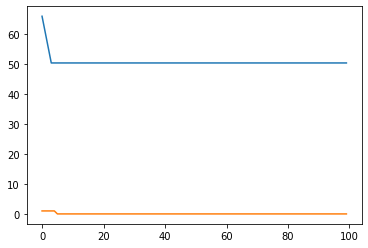

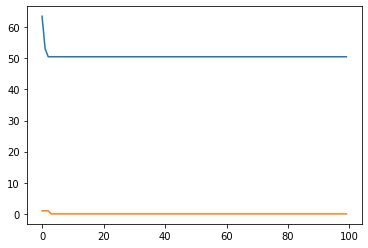

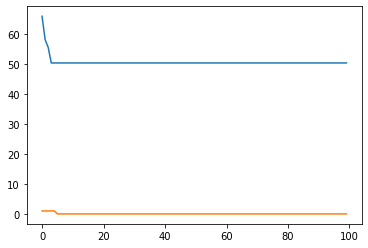

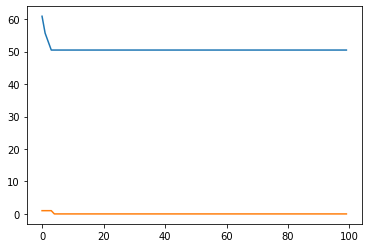

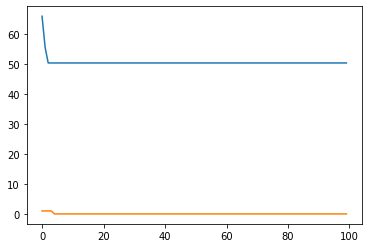

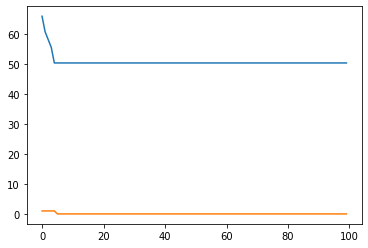

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[1, 1, 2, 1, 3, 3, 2, 2, 3, 1, 2, 2, 3, 1, 3] : 50.47009956608504 : 1

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[2, 2, 3, 3, 3, 3, 2, 2, 1, 2, 1, 1, 3, 1, 1] : 58.278168622418185 : 1

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[3, 3, 2, 3, 2, 2, 1, 1, 2, 3, 1, 1, 2, 3, 1] : 50.47009956608504 : 1

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[3, 3, 3, 3, 2, 2, 1, 1, 2, 1, 1, 1, 2, 3, 2] : 50.47009956608504 : 1

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[3, 3, 2, 3, 1, 1, 2, 2, 1, 3, 2, 2, 1, 3, 1] : 50.47009956608504 : 1

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[2, 2, 3, 2, 3, 3, 1, 1, 3, 2, 1, 1, 3, 2, 1] : 50.47009956608504 : 1

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[1, 1, 1, 1, 2, 2, 3, 3, 2, 3, 3, 3, 2, 1, 2] : 50.47009956608504 : 1

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 3, 3, 1, 2, 3] : 50.47009956608504 : 1

[3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1]
[1, 1, 1, 1, 3, 3

In [15]:
A = generate_graph(3,15,z,0.6,0.1)
B = generate_graph(3,15,z,0.6,0.1)
vectors_A,_,_ = random_z(z,z1, 10, A, 0.6,0.1,15,3)
vectors_B,_,_ = random_z(z,z1, 10, B, 0.6,0.1,15,3)
best = []
best_value = 99999
for e in vectors_A:
  ham = min_hamming_calculator(e,z,3)
  if(best_value > ham):
    best = e
for e in vectors_B:
  ham = min_hamming_calculator(e,z,3)
  if(best_value > ham):
    best = e
print(e)

Section 4

>Sim 12

In [13]:
import numpy as np
n = 1000
groups = [np.random.binomial(1,0.5) for i in range(n)]
def sim_A(n,groups,p,q):
  A = np.zeros((n,n))
  for i in range(n):
    for j in range(i+1):
      prob = p
      if(groups[i] != groups[j]):
        prob=q
      A[i,j] = np.random.binomial(1,prob)
      A[j,i] = A[i,j]
  D_A = np.diag(np.sum(A,axis=0))
  L_A = D_A - A
  eig_val, eig_vec = np.linalg.eig(L_A)
  return eig_val,eig_vec

def sim_W(n,groups,p,q):
  W = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      prob = p
      if(groups[i] != groups[j]):
        prob=q
      W[i,j] = prob
      W[j,i] = W[i,j]
  D_W = np.diag(np.sum(W,axis=0))
  L_W = D_W - W
  eig_val, eig_vec = np.linalg.eig(L_W)
  return eig_val,eig_vec

_,a = sim_A(n,groups,0.1,0.01)
_,w = sim_W(n,groups,0.1,0.01)
eig_2_w = w[:,1]
eig_2_a = a[:,1]

eig_2_w = np.abs(eig_2_w)
eig_2_w_norm = eig_2_w / np.linalg.norm(eig_2_w)

X = np.column_stack((eig_2_w_norm,))
X = np.column_stack((eig_2_w_norm,))
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
W_labels = kmeans.fit_predict(X)

eig_2_a = np.abs(eig_2_a)
eig_2_a_norm = eig_2_a / np.linalg.norm(eig_2_a)

X = np.column_stack((eig_2_a_norm,))
X = np.column_stack((eig_2_a_norm,))
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
A_labels = kmeans.fit_predict(X)

print("W result: ",max(np.count_nonzero(W_labels==groups),np.count_nonzero(W_labels!=groups))/len(groups))
print("A result: ",max(np.count_nonzero(A_labels==groups),np.count_nonzero(A_labels!=groups))/len(groups))

W result:  1.0
A result:  0.564


>Sim 13

In [14]:
def sample(n):
  groups = [np.random.binomial(1,0.5) for i in range(n)]
  _,a = sim_A(n,groups,0.1,0.01)
  _,w = sim_W(n,groups,0.1,0.01)
  eig_2_w = w[:,1]
  eig_2_a = a[:,1]
  eig_2_w = np.abs(eig_2_w)
  eig_2_w_norm = eig_2_w / np.linalg.norm(eig_2_w)

  X = np.column_stack((eig_2_w_norm,))
  X = np.column_stack((eig_2_w_norm,))

  kmeans = KMeans(n_clusters=2)
  W_labels = kmeans.fit_predict(X)

  eig_2_a = np.abs(eig_2_a)
  eig_2_a_norm = eig_2_a / np.linalg.norm(eig_2_a)

  X = np.column_stack((eig_2_a_norm,))
  X = np.column_stack((eig_2_a_norm,))

  kmeans = KMeans(n_clusters=2)
  A_labels = kmeans.fit_predict(X)
  print(f'======={n}======')
  print("W result: ",max(np.count_nonzero(W_labels==groups),np.count_nonzero(W_labels!=groups))/len(groups))
  print("A result: ",max(np.count_nonzero(A_labels==groups),np.count_nonzero(A_labels!=groups))/len(groups))
for i in range(100,2000,200):
  sample(i)

=======100======
W result:  1.0
A result:  0.51
=======300======
W result:  1.0
A result:  0.5
=======500======
W result:  1.0
A result:  0.644
=======700======
W result:  1.0
A result:  0.5457142857142857
=======900======
W result:  1.0
A result:  0.5088888888888888
=======1100======
W result:  0.9990909090909091
A result:  0.509090909090909
=======1300======
W result:  1.0
A result:  0.7753846153846153
=======1500======
W result:  1.0
A result:  0.5353333333333333
=======1700======
W result:  1.0
A result:  0.5794117647058824
=======1900======
W result:  1.0
A result:  0.531578947368421


>Sim 14

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

np.random.seed(42)

from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)
df = pd.DataFrame(data=california_housing.data, 
                  columns=california_housing.feature_names)
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
for feature in df.columns:
    df[feature].fillna(df[feature].median(), inplace=True)

In [ ]:
def assign(x,centers):
  dists = []
  for row in x:
    arr = []
    for i in centers:
      arr.append(np.linalg.norm(row - centers[i]))
    arr.append(np.argmin(arr))
    dists.append(arr)
  return dists

def update(x,centers,dists):
  for c in centers:
    inds = [dists.index(row) for row in dists if row[-1] == c]
    centers[c] = x.iloc[inds].mean()
  return centers

def kmean(x,k):
  min = x.min()
  max = x.max()
  centers = {i: np.random.uniform(min, max) for i in range(k)}
  dists = assign(x, centers)
  while True:
      old = [x[-1] for x in dists]
      centers = update(x, centers, dists)
      dists = assign(x, centers)
      
      new = [x[-1] for x in dists]
      
      if np.allclose(old, new, 100*k, 1.0e+1):
        break
  return dists, centers

In [ ]:
def J(X, K):
    
    means = []
    stds = []
    
    for k in range(1, K + 1):
        dist, c = kmean(X, k)
        mean = []
        std = []
        for i in range(k):
          di = [x[i] for x in dist if x[-1] == i]
          mean.append(np.average(di))
          std.append(np.std(di))
          
        stds.append(np.mean(std))
        means.append(np.mean(mean))
        
    
    return means, stds

In [ ]:
k = 3

dist, cent = kmean(df['MedInc'], k)

In [ ]:
def grouping(x,center):
  dist = 99999
  index = -1
  for i in range(len(center)):
    if(abs(x-center[i]) < dist):
      dist = abs(x-center[i])
      index = i
  return index

In [ ]:
df['Center'] = 0
for i in range(20640):
  df['Center'][i] = dist[i][-1]

<ipython-input-7-b625cc3aa82a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Center'][i] = dist[i][-1]


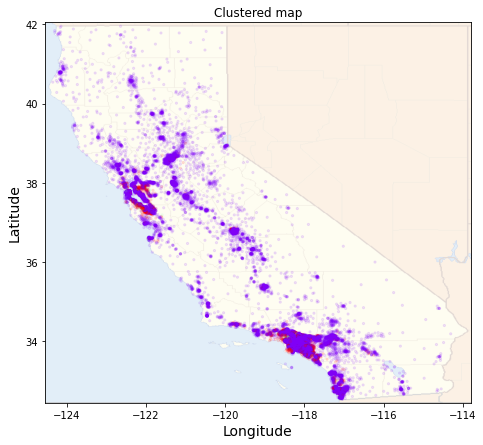

In [ ]:
cali_image_url = 'https://upload.wikimedia.org/wikipedia/commons/1/1b/California_Locator_Map.PNG'
cali = plt.imread(cali_image_url)
df.plot(kind="scatter", x = "Longitude", y = "Latitude", alpha = 0.1,
    s = 5, figsize = (10,7), colorbar = False,
    c = df['Center'], cmap = plt.get_cmap("rainbow"),
    sharex=False)



plt.imshow(cali, extent=[-124.55, -113.80, 32.45, 42.05], alpha = 0.3)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title('Clustered map')

plt.show()

>Sim 15

In [ ]:
%matplotlib inline
from sklearn import cluster
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
#import matplotlib.colors as colors
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

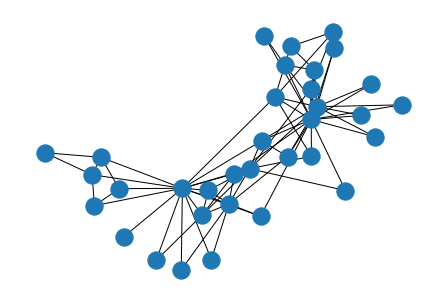

In [ ]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
nx.draw(G)

In [ ]:
def draw_communities(G, membership, pos):
    fig, ax = plt.subplots(figsize=(16,9))
    
    club_dict = defaultdict(list)
    for student, club in enumerate(membership):
        club_dict[club].append(student)
    
    norm = cm.colors.Normalize(vmin=0, vmax=len(club_dict.keys()))
    
    for club, members in club_dict.items():
        nx.draw_networkx_nodes(G, pos,
                               nodelist=members,
                               node_color=cm.jet(norm(club)),
                               node_size=500,
                               alpha=0.8,
                               ax=ax)

    plt.title("Zachary's Karate Club")
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)

In [ ]:
def graph_to_edge_matrix(G):
    # Initialize edge matrix with zeros
    edge_mat = np.zeros((len(G), len(G)), dtype=int)

    # Loop to set 0 or 1 (diagonal elements are set to 1)
    for node in G:
        for neighbor in G.neighbors(node):
            edge_mat[node][neighbor] = 1
        edge_mat[node][node] = 1

    return edge_mat

In [ ]:
edge_mat = graph_to_edge_matrix(G)
edge_mat

array([[1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [ ]:
def clustering(num_clusters,edge_mat):
  results = []
  algorithms = {}

  algorithms['kmeans'] = cluster.KMeans(n_clusters=num_clusters, n_init=200)

  algorithms['agglom'] = cluster.AgglomerativeClustering(n_clusters=num_clusters, linkage="ward")

  algorithms['spectral'] = cluster.SpectralClustering(n_clusters=num_clusters, affinity="precomputed", n_init=200)

  algorithms['affinity'] = cluster.AffinityPropagation(damping=0.6)

  for model in algorithms.values():
      model.fit(edge_mat)
      results.append(list(model.labels_))

  algorithms['spectral'].labels_
  draw_communities(G, algorithms['spectral'].labels_, pos)

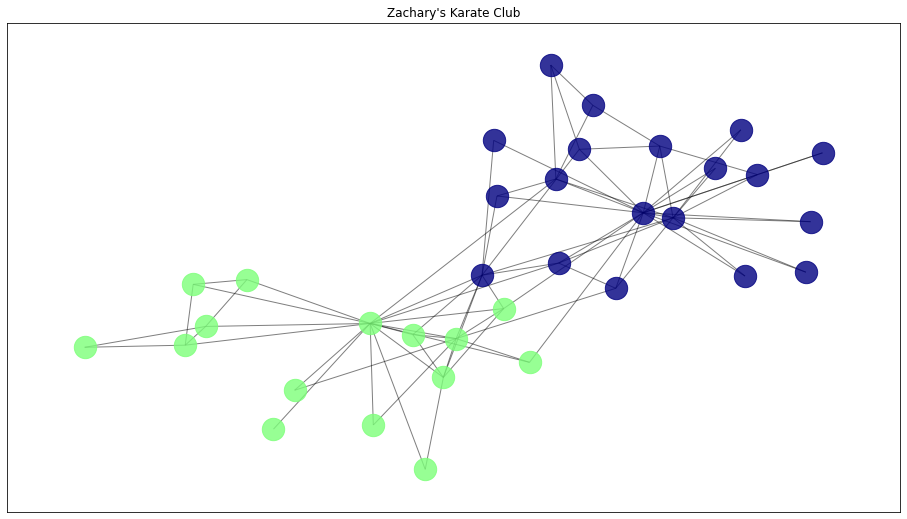

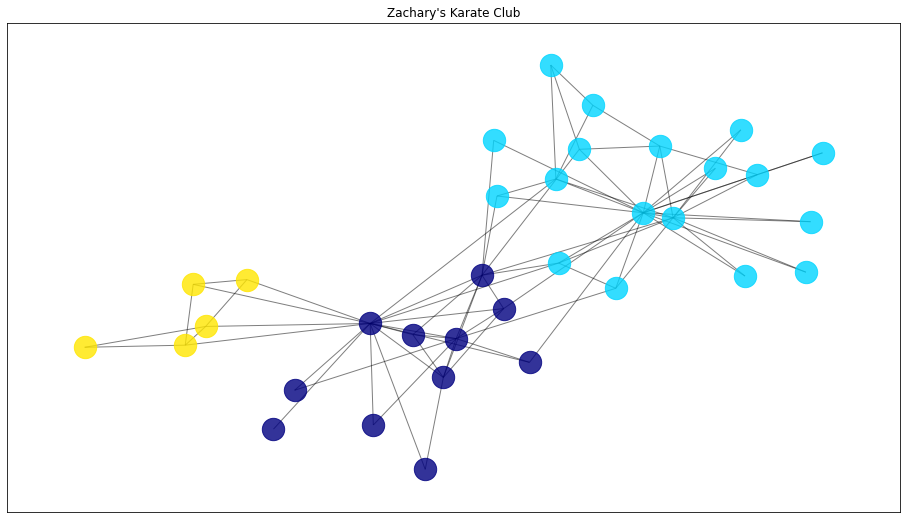

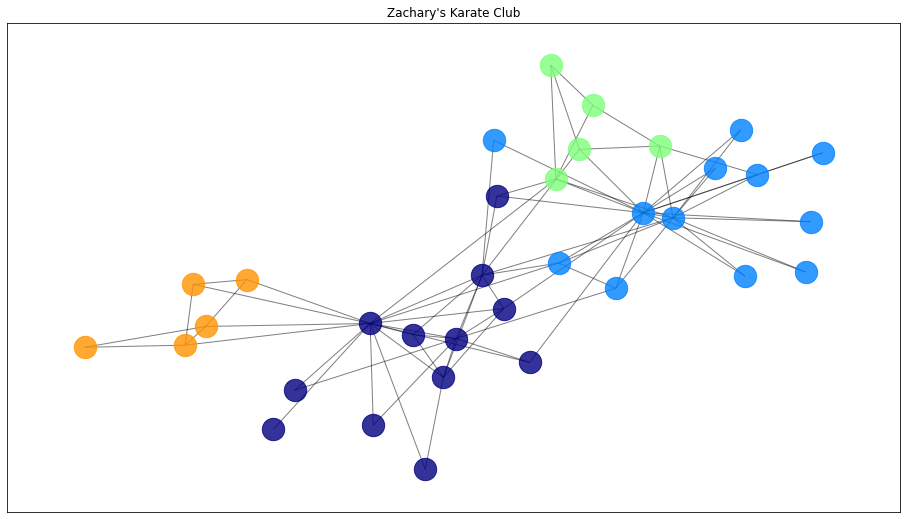

In [ ]:
clustering(2,edge_mat)
clustering(3,edge_mat)
clustering(4,edge_mat)

>Sim 16

In [ ]:
%matplotlib inline
from sklearn import cluster
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
#import matplotlib.colors as colors
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

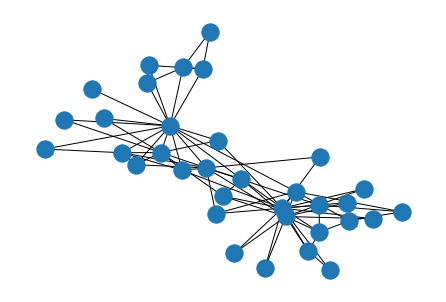

In [ ]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
nx.draw(G)

In [ ]:
def draw_communities(G, membership, pos):
    fig, ax = plt.subplots(figsize=(16,9))
    
    club_dict = defaultdict(list)
    for student, club in enumerate(membership):
        club_dict[club].append(student)
    
    norm = cm.colors.Normalize(vmin=0, vmax=len(club_dict.keys()))
    
    for club, members in club_dict.items():
        nx.draw_networkx_nodes(G, pos,
                               nodelist=members,
                               node_color=cm.jet(norm(club)),
                               node_size=500,
                               alpha=0.8,
                               ax=ax)

    plt.title("Zachary's Karate Club")
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)

In [ ]:
def graph_to_edge_matrix(G):
    # Initialize edge matrix with zeros
    edge_mat = np.zeros((len(G), len(G)), dtype=int)

    # Loop to set 0 or 1 (diagonal elements are set to 1)
    for node in G:
        for neighbor in G.neighbors(node):
            edge_mat[node][neighbor] = 1
        edge_mat[node][node] = 1

    return edge_mat

In [ ]:
edge_mat = graph_to_edge_matrix(G)
edge_mat

array([[1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [ ]:
def calc_fs(edge_mat,labels):
  m,n = edge_mat.shape
  cs =0
  ms = 0
  
  for i in range(m):
    for j in range(i):
      if(edge_mat[i][j] == 1):
        if(labels[i]==labels[j]):
          ms = ms + 1
        else:
          cs = cs + 1
  return (cs/(2*ms + cs))

In [ ]:
def clustering(num_clusters,edge_mat):
  results = []
  algorithms = {}

  algorithms['kmeans'] = cluster.KMeans(n_clusters=num_clusters, n_init=200)
  algorithms['spectral'] = cluster.SpectralClustering(n_clusters=num_clusters, affinity="precomputed", n_init=200)

  for model in algorithms.values():
      model.fit(edge_mat)
      results.append(list(model.labels_))

  draw_communities(G, algorithms['spectral'].labels_, pos)
  return calc_fs(edge_mat,algorithms['spectral'].labels_)

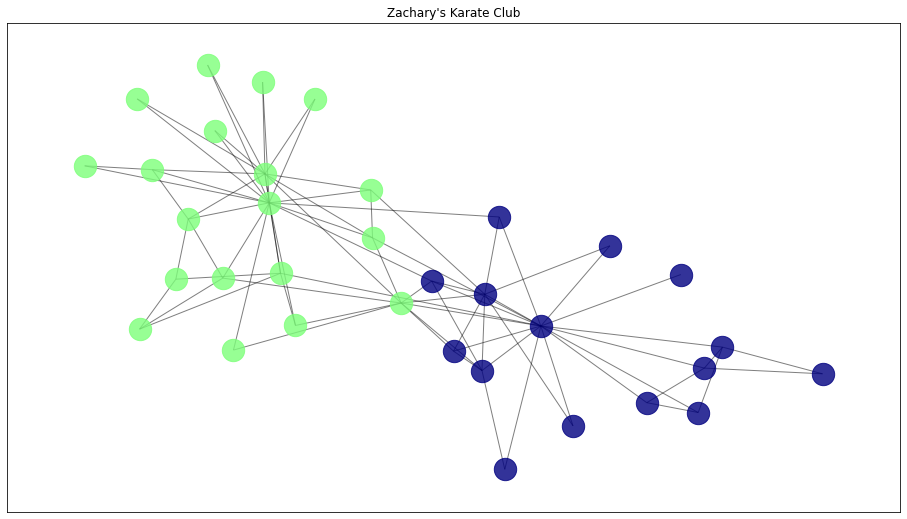

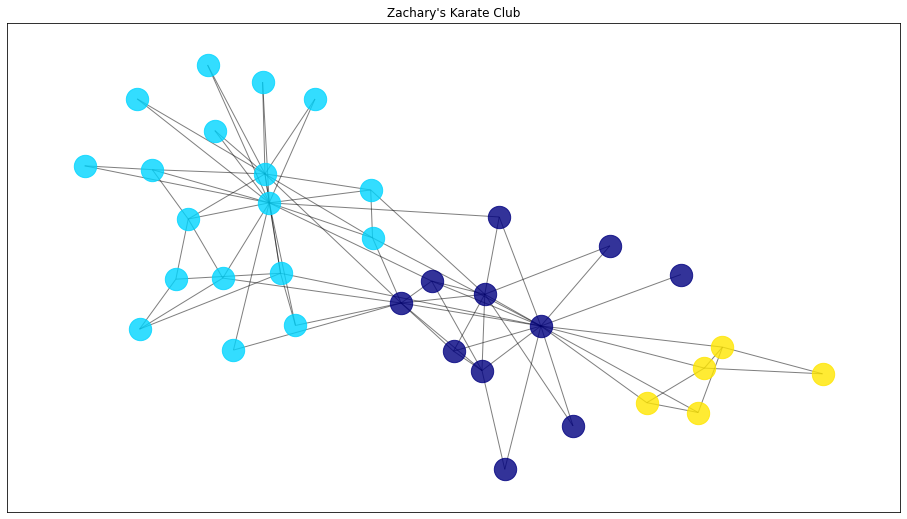

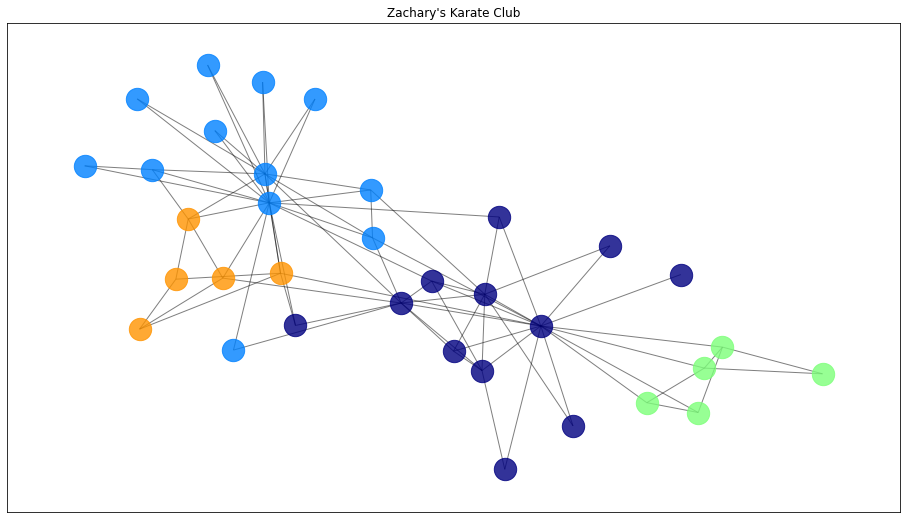

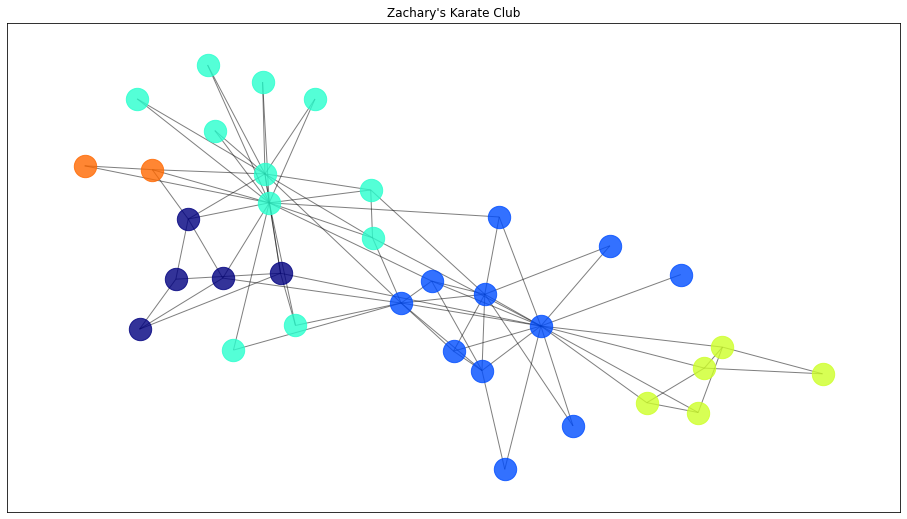

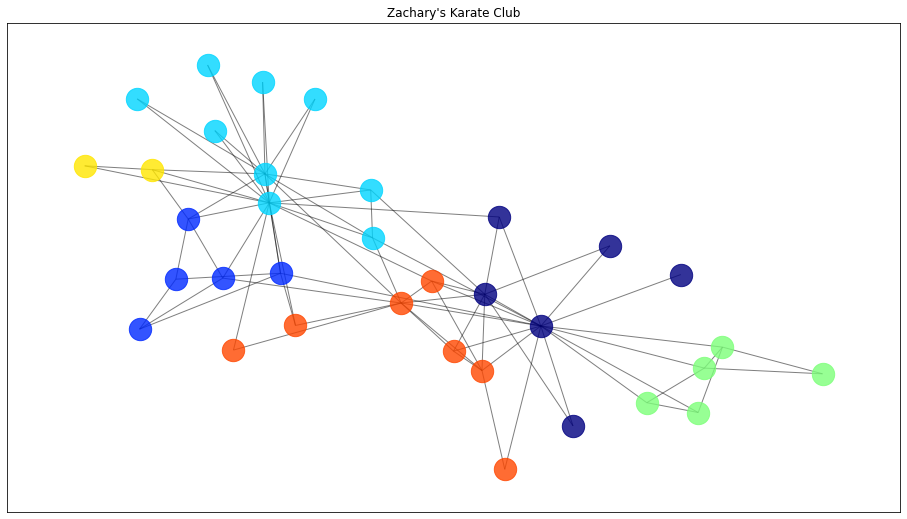

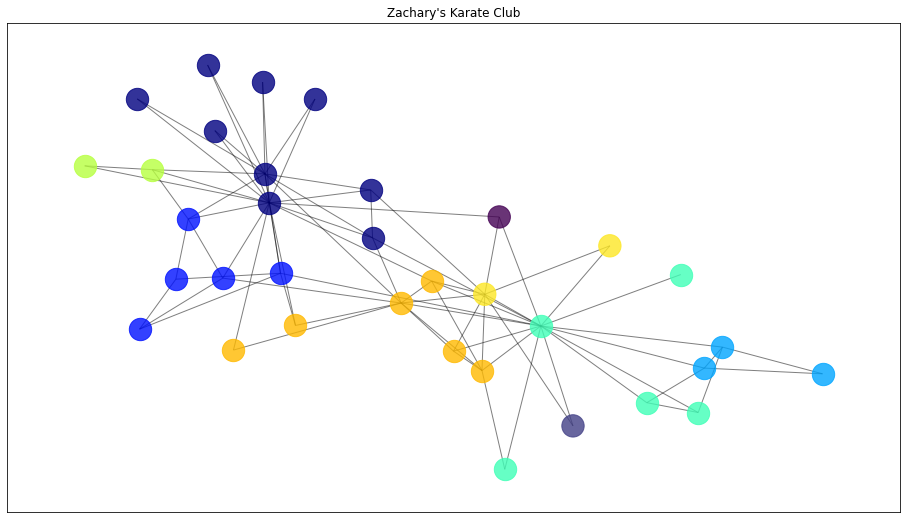

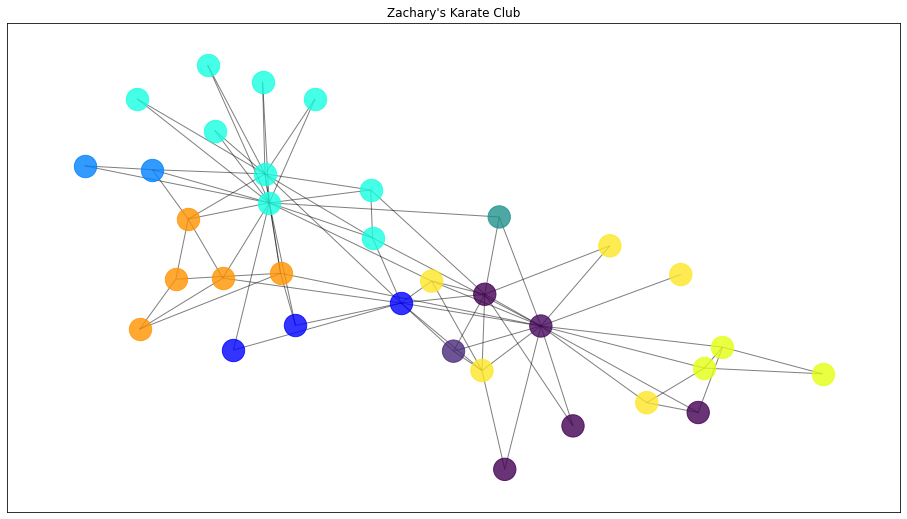

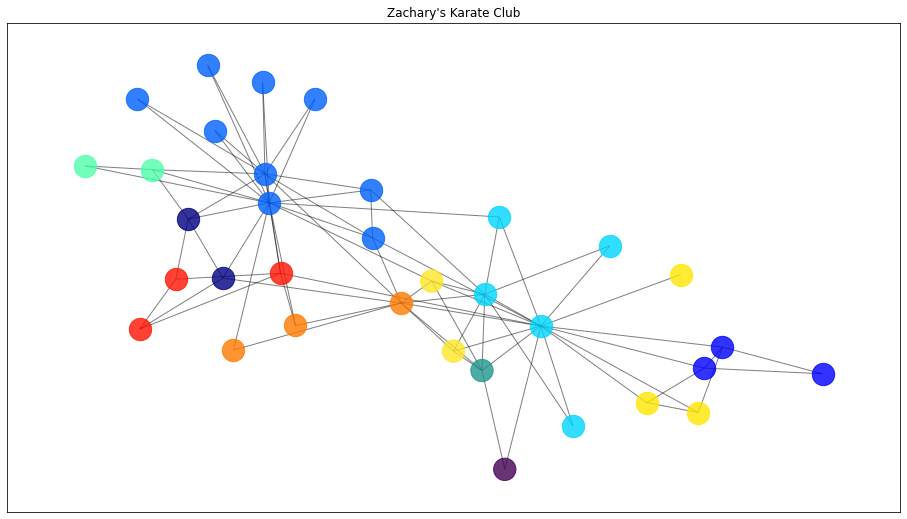

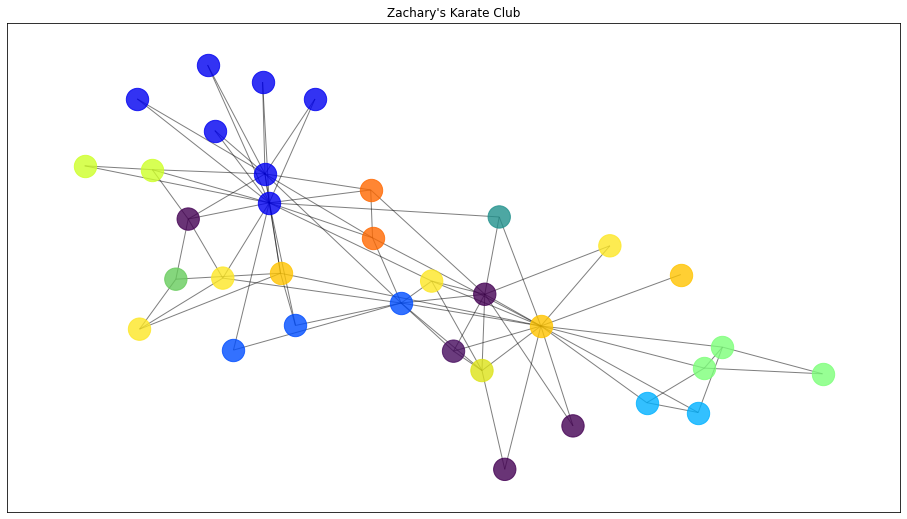

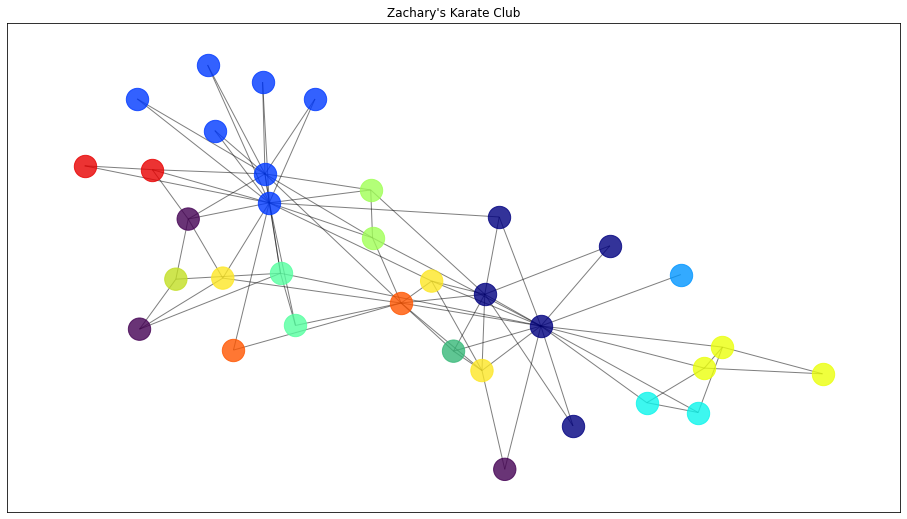

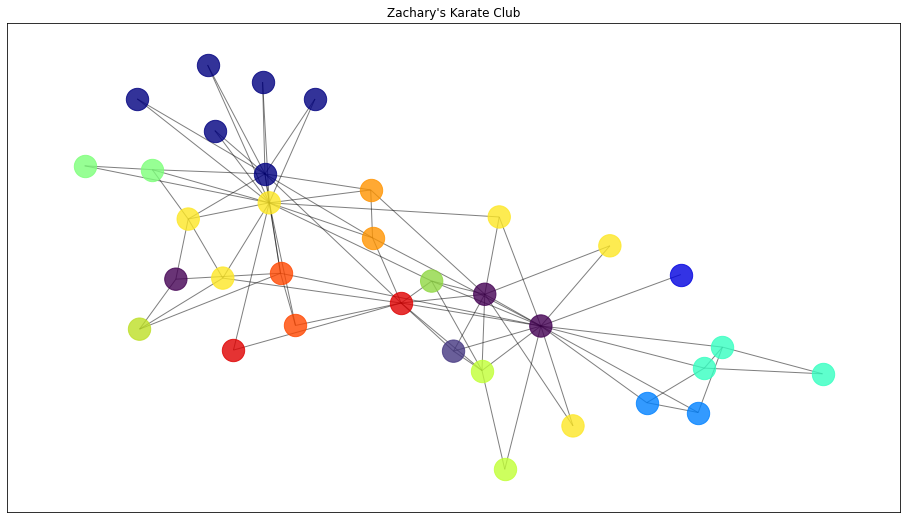

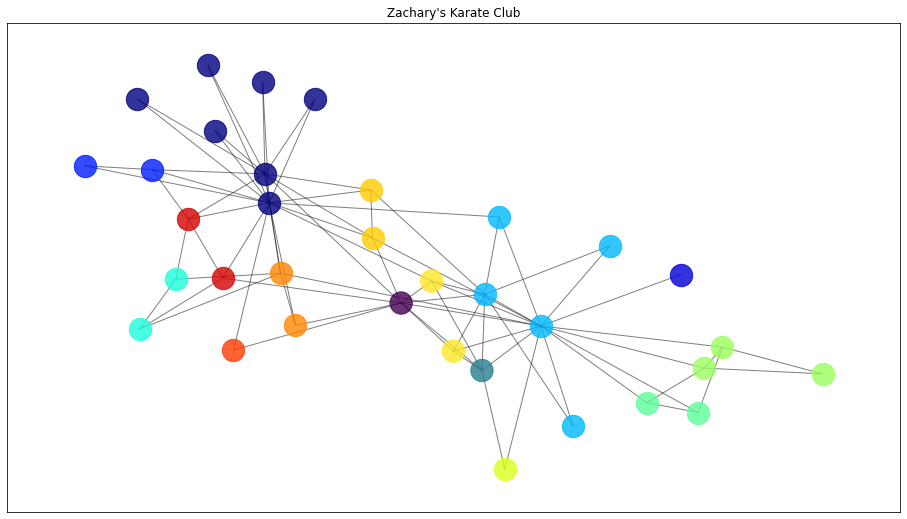

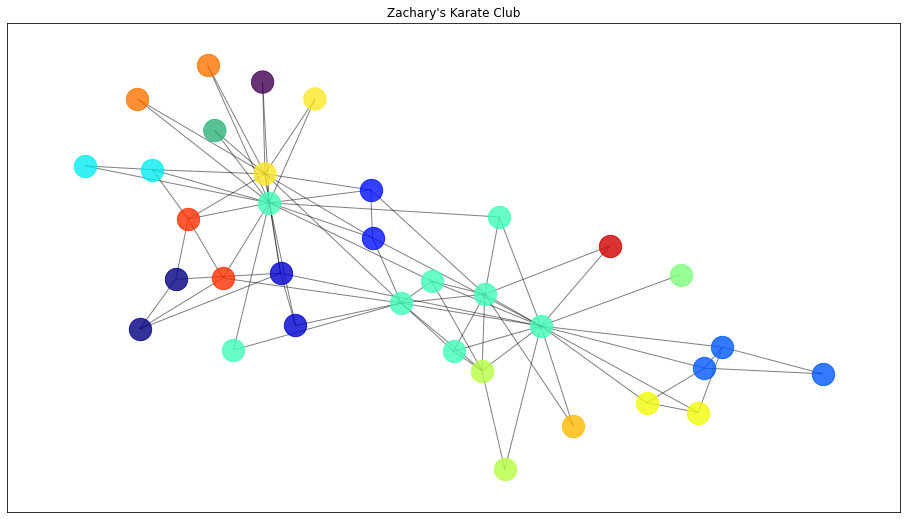

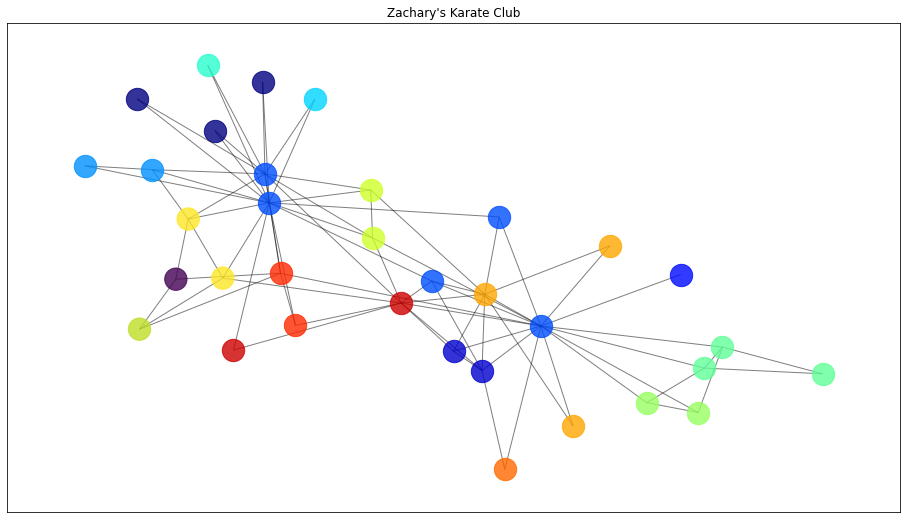

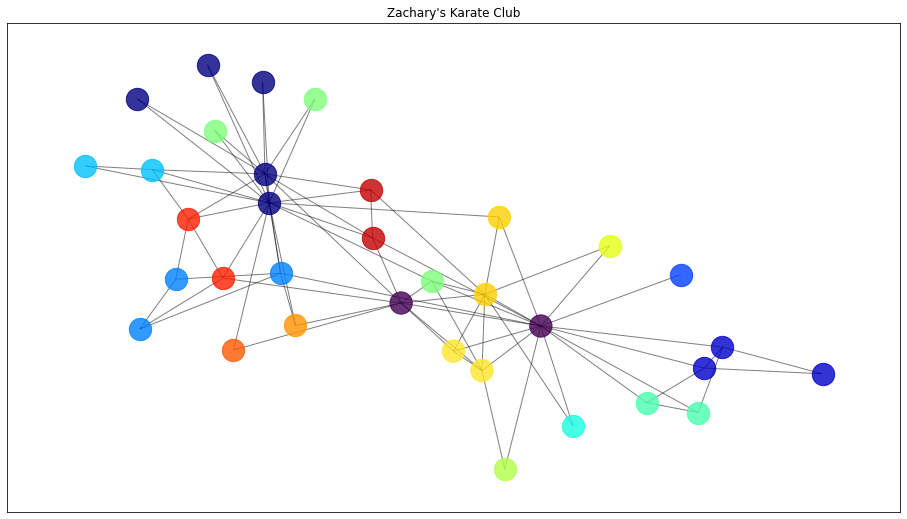

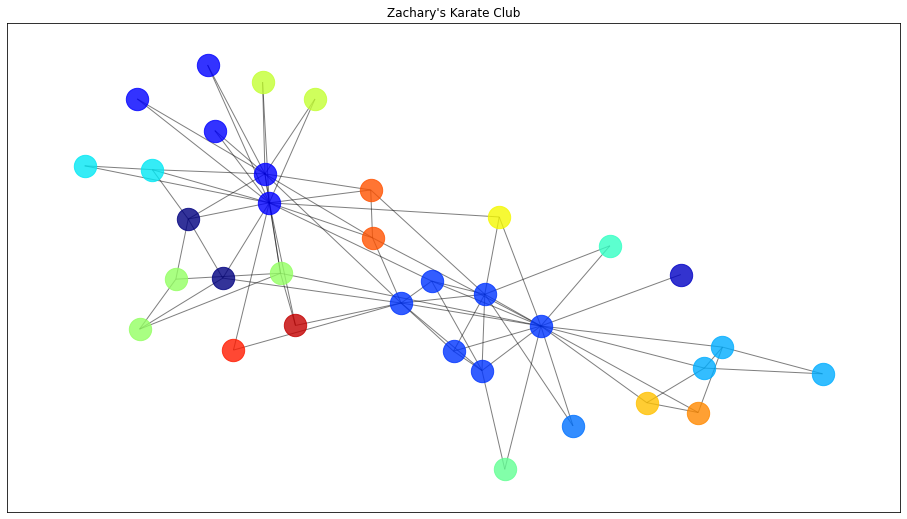

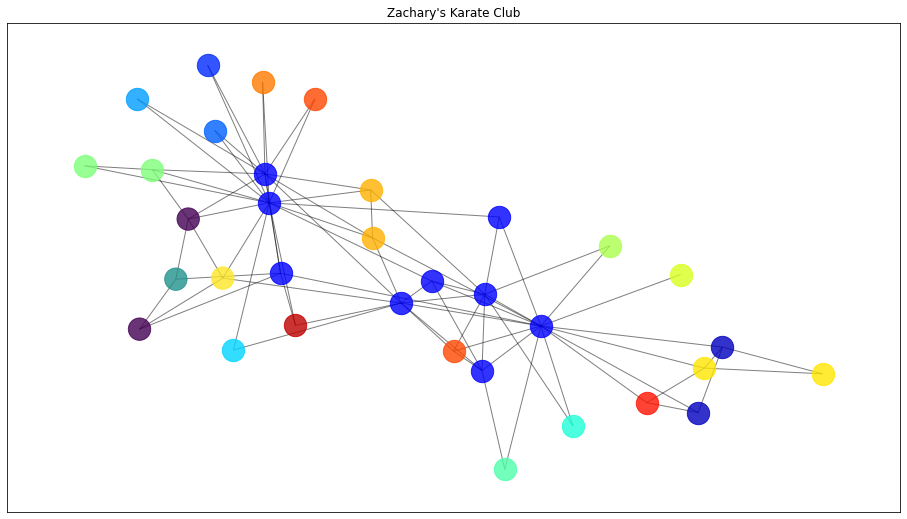

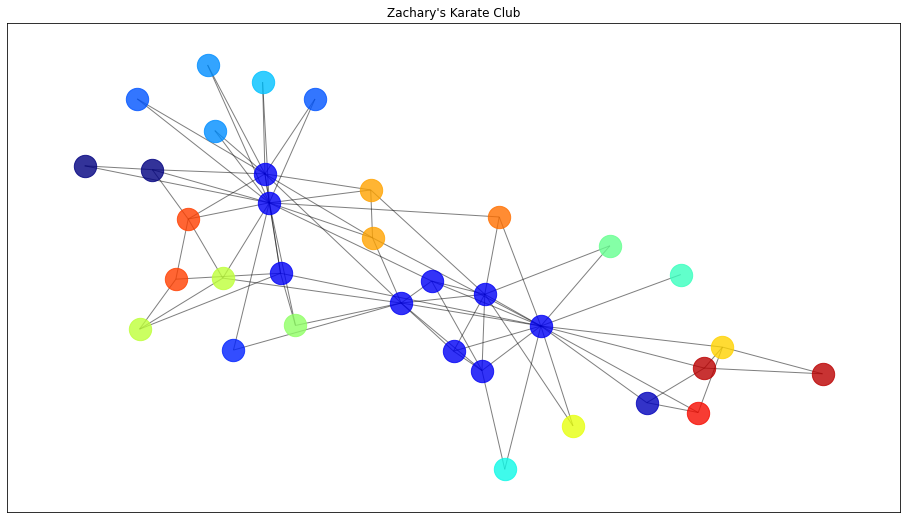

In [ ]:
fscores = [clustering(i,edge_mat) for i in range(2,20)]

[0.0684931506849315, 0.09859154929577464, 0.15555555555555556, 0.18181818181818182, 0.2682926829268293, 0.31092436974789917, 0.3448275862068966, 0.3565217391304348, 0.43119266055045874, 0.40540540540540543, 0.5145631067961165, 0.41818181818181815, 0.4716981132075472, 0.5918367346938775, 0.5294117647058824, 0.4444444444444444, 0.4857142857142857, 0.5145631067961165]


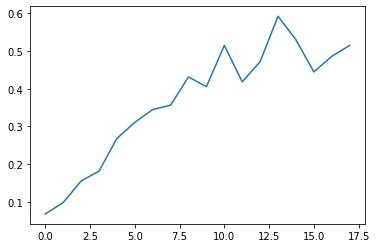

In [ ]:
print(fscores)
plt.plot(fscores)
plt.show()
# best is 13 upto a point, but in the [2-10] range, increasing is the bst move

**Section 5**

> Sim 17

In [ ]:
import numpy as np
def relationsampler(n,p):
  k = n*(n-1)/2
  relations = np.random.binomial(k,p)
  return relations
n=1000
p=0.0034
m=3000
sum = 0
for i in range(10):
  sum = sum + relationsampler(n,p)

print(sum/10)

print(m*95/100,m*105/100)


1696.8
2850.0 3150.0


No. It's not.

> Sim 18

[0.0, 0.0, 0.0, 0.0, 0.4, 0.9, 2.6, 5.5, 12.4, 21.3, 31.5, 51.4, 72.2, 80.6, 90.4, 99.9, 95.2, 95.9, 85.6, 71.9, 55.4, 39.8, 30.2, 20.2, 12.8, 10.3, 5.9, 3.4, 2.2, 1.1, 0.3, 0.5, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

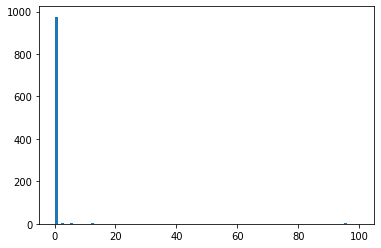

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate(n,p):
	k = (n)*(n-1)/2
	sample = [np.random.binomial(k,p) for i in range(10)]
	print(sample)
	return np.mean(sample)

def same_color_counter(n,p):
	unshaped = [np.random.binomial(1,p) for i in range(n*n)]
	m = np.reshape(unshaped,(n,n))
	for i in range(n):
		for j in range(n):
			if i>j:
				m[i][j] = m[j][i]
			if i == j:
				m[i][j]=0

	x = np.sum(m, axis=1)
	y = np.bincount(x)
	return np.count_nonzero(x > np.mean(x)),y

n = 1000
results_same_color = []
results_same_degree = [0]*n
for i in range(10):
  result = same_color_counter(1000, 0.016)
  results_same_color.append(result[0])
  results_same_degree = np.add(np.append(result[1],([0]*(n-len(result[1])))), results_same_degree)

result_average = [results_same_degree[i]/10 for i in range(0,len(results_same_degree))]
print(result_average)
plt.hist(result_average, bins = 100)
plt.show()	


> Sim 19

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sim(n,p):
	unshaped = [np.random.binomial(1,p) for i in range(n*n)]

	A = np.reshape(unshaped,(n,n))
	A = np.triu(A)
	A = A + A.T

	np.fill_diagonal(A,0)

	Anot = np.where(A>0,0,1)

	np.fill_diagonal(Anot,0)

	B = np.matmul(A,A)
	
	C = np.multiply(A,B)

	D = np.multiply(Anot, B)
	
	return np.sum(C)/6, np.sum(D)/2

triangle = []
p2 = []
for i in range(5):
	print(i)
	result = sim(1500,0.01)
	triangle.append(result[0])
	p2.append(result[1])
print(np.mean(triangle), np.mean(p2))


0
1
2
3
4
551.8 167046.8


> Sim 20

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sim(n,p):
	unshaped = [np.random.binomial(1,p) for i in range(n*n)]
	A = np.reshape(unshaped,(n,n))
	A = np.triu(A)
	A = A + A.T
	np.fill_diagonal(A,0)
	B = np.matmul(A,A)
	C = np.multiply(A,B)
	return (np.sum(C)/(6*n))

print(sim(1000,0.003))

0.004


> sim 21

In [ ]:
import networkx as nx 
import numpy as np
def sim(n,p):
	unshaped = [np.random.binomial(1,p) for i in range(n*n)]
	A = np.reshape(unshaped,(n,n))
	A = np.triu(A)
	A = A + A.T
	np.fill_diagonal(A,0)
	A = nx.floyd_warshall_numpy(nx.from_numpy_array(A))
	A = np.where(A > n+1,0,A)
	paths_count = (n)*(n-1)
	return np.sum(A)/paths_count

print(sim(1000,0.0033))

5.233377377377377


> Sim 22

In [ ]:
import networkx as nx 
import numpy as np
def sim(n,p):
	unshaped = [np.random.binomial(1,p) for i in range(n*n)]
	A = np.reshape(unshaped,(n,n))
	A = np.triu(A)
	A = A + A.T
	np.fill_diagonal(A,0)
	A = nx.floyd_warshall_numpy(nx.from_numpy_array(A))
	A = np.where(A > n+1,0,A)
	return np.max(A)

sum = 0
for i in range(100):
	sum += sim(50,0.34)
print (sum/100)

2.78


> Sim 23

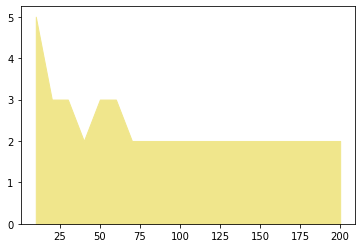

In [ ]:
import networkx as nx 
import numpy as np
import matplotlib.pyplot as plt

def sim(n,p):
	unshaped = [np.random.binomial(1,p) for i in range(n*n)]
	A = np.reshape(unshaped,(n,n))
	A = np.triu(A)
	A = A + A.T
	np.fill_diagonal(A,0)
	A = nx.floyd_warshall_numpy(nx.from_numpy_array(A))
	A = np.where(A > n+1,0,A)
	return np.max(A)

x = [10 + 10*i for i in range(0,20)]
l = []
for i in range(0,20):
	l.append(sim(10 + i*10,0.34))

plt.stackplot(x,l,color="khaki")
plt.plot()
plt.show()


> Sim 24

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sim(n,p):
	unshaped = [np.random.binomial(1,p) for i in range(n*n)]
	A = np.reshape(unshaped,(n,n))
	A = np.triu(A)
	A = A + A.T
	np.fill_diagonal(A,0)
	Anot = np.where(A>0,0,1)
	np.fill_diagonal(Anot,0)
	B = np.matmul(A,A)
	C = np.multiply(A,B)
	D = np.multiply(Anot, B)
	return np.sum(C)/6

triangle = []

for i in range(100):
	result = sim(100,0.34)
	triangle.append(result)

print(np.mean(triangle))

6293.62


> Sim 25

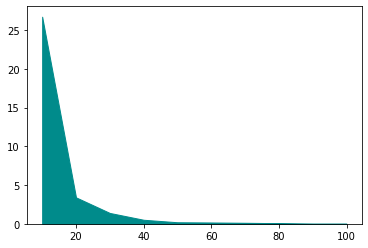

[26.71, 3.41, 1.4, 0.52, 0.2, 0.17, 0.13, 0.08, 0.01, 0.01]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sim(n,p):
	unshaped = [np.random.binomial(1,p) for i in range(n*n)]
	A = np.reshape(unshaped,(n,n))
	A = np.triu(A)
	A = A + A.T
	np.fill_diagonal(A,0)
	Anot = np.where(A>0,0,1)
	np.fill_diagonal(Anot,0)
	B = np.matmul(A,A)
	C = np.multiply(A,B)
	D = np.multiply(Anot, B)
	return np.sum(C)/6

triangle = []
means = []
x = []
for i in range(10,101,10):
	for j in range(100):
		result = sim(i,60/i**2)
		triangle.append(result)
	x.append(i)
	means.append(np.mean(triangle))
	triangle.clear()
plt.stackplot(x,means,color='darkcyan')
plt.plot()
plt.show()
print(means)


> Sim 26

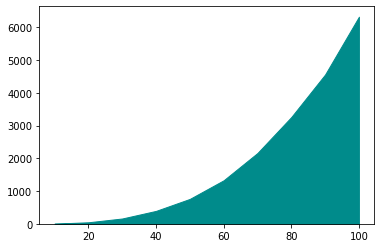

[5.29, 46.59, 162.17, 394.61, 760.83, 1329.06, 2163.03, 3261.29, 4561.14, 6326.58]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sim(n,p):
	unshaped = [np.random.binomial(1,p) for i in range(n*n)]
	A = np.reshape(unshaped,(n,n))
	A = np.triu(A)
	A = A + A.T
	np.fill_diagonal(A,0)
	Anot = np.where(A>0,0,1)
	np.fill_diagonal(Anot,0)
	B = np.matmul(A,A)
	C = np.multiply(A,B)
	D = np.multiply(Anot, B)
	return np.sum(C)/6

triangle = []
means = []
x = []
for i in range(10,101,10):
	for j in range(100):
		result = sim(i,0.34)
		triangle.append(result)
	x.append(i)
	means.append(np.mean(triangle))
	triangle.clear()
plt.stackplot(x,means,color='darkcyan')
plt.plot()
plt.show()
print(means)

> Sim 27

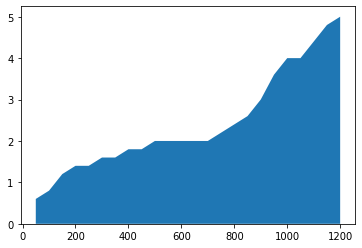

[0.6, 0.2, 0.4, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.4, 0.6, 0.4, 0.0, 0.4, 0.4, 0.2]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sim(n,p):
	unshaped = [np.random.binomial(1,p) for i in range(n*n)]
	A = np.reshape(unshaped,(n,n))
	A = np.triu(A)
	A = A + A.T
	np.fill_diagonal(A,0)
	Anot = np.where(A>0,0,1)
	np.fill_diagonal(Anot,0)
	B = np.matmul(A,A)
	C = np.multiply(A,B)
	D = np.multiply(Anot, B)
	return np.sum(C)/6

triangle = []
means = []
cmean = [0]
x = []
for i in range(50,1201,50):
	for j in range(5):
		result = sim(i,1/i)
		triangle.append(result)
	x.append(i)
	means.append(np.mean(triangle))
	cmean.append(cmean[len(cmean)-1]+np.mean(triangle))#prbbl wrong
	triangle.clear()
del(cmean[0])
plt.stackplot(x,cmean)
plt.plot()
plt.show()
print(means)

>Sim 28

<ipython-input-10-499cc5740918>:22: RuntimeWarning: invalid value encountered in true_divide
  G[:,i] = G[:,i] / G[:,i]


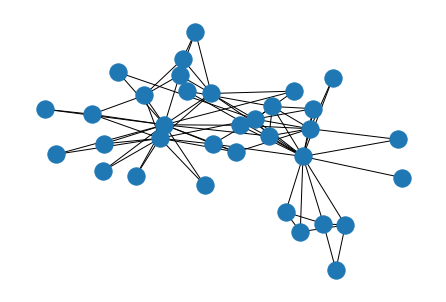

In [10]:
import numpy as np
%matplotlib inline
from sklearn import cluster
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
#import matplotlib.colors as colors
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
nx.draw(G)
saved_G=G
G = nx.to_numpy_array(G)
degs = np.zeros(G.shape[0])
orig_mat=np.zeros((G.shape[0],G.shape[1]))
for i in range(G.shape[0]):
  G[:,i] = G[:,i] / G[:,i]
  np.nan_to_num(G,0)
  orig_mat[:,i]=G[:,i]
  S = np.sum(G[:,i])
  degs[i]=S
  G[:,i] = np.divide(G[:,i],S)


In [11]:

def randomwalk(matrix, t):
  return np.power(matrix,t)
# def pij(matrix,i,j):
#   m = matrix[:,i]
#   m = m[j,:]
#   return np.sum(m)/(len(i)*len(j))

# def cluster_distance(matrix,i,j,deglist,clist):
#   sum =0 
#   for k in clist.keys():
#     if len(clist[k])==0:
#       continue
#     sum = sum + ((pij(matrix,i,clist[k])-pij(matrix,j,clist[k]))**2)/np.sum(deglist[clist[k]])
#   return np.sqrt(sum)


def cluster_distance(matrix,i,j,deglist,clist):
  ci = matrix[:,i]
  if ci.ndim != 1:
    ci = np.sum(ci,axis=1)
  #print(j)
  cj = matrix[:,j]
  if cj.ndim != 1:
    cj = np.sum(cj,axis=1)
  diff = ci-cj
  diff = np.multiply(diff,diff)
  divs = np.divide(diff,deglist)
  sum = np.sum(divs)
  return np.sqrt(sum)

def join_clusters(clist,matrix,i,j):
  #print(i,j)
  c = np.zeros(len(clist[i])+len(clist[j])).astype(int)
  c[:len(clist[i])] = clist[i]
  c[len(clist[i]):] = clist[j]
  #print(c)
  clist[j] = []
  clist[i] = c.astype(int)
  return clist

def optimize(clist,matrix,deglist):
  _,b = matrix.shape
  min= np.inf
  i_min = -1
  j_min = -1
  for j in range(b):
    if len(clist[j])==0:
      continue
    for i in range(b):
      if len(clist[i])==0:
        continue
      if(i==j):
        continue
      
      c = cluster_distance(matrix,clist[i],clist[j],deglist,clist)
      if(c < min):
        min = c
        i_min = i
        j_min = j
  min = np.inf
  return join_clusters(clist,matrix,i_min,j_min)

def number_of_clusters(clist):
  n=0
  for i in clist.keys():
    if len(clist[i])!=0:
      n = n + 1
  return n


  
def cl_in_edges(origmat,clists):
  a = origmat[:,clists]
  b = a[clists,:]
  return np.sum(b)/2,np.sum(a)

def criterion_tests(origmat,clist):
  num_cls = number_of_clusters(clist)
  total_edges = np.sum(origmat)/2
  Q=0
  for i in clist.keys():
    if len(clist[i])==0:
      continue
    l_k,d_k = cl_in_edges(origmat,clist[i])
    Q=Q+ (l_k/total_edges)-(d_k/(2*total_edges)**2)
  return Q
    
def getcolors(clist):
  n = 0
  colors = np.array([0]*34)
  for i in range(33):
    if(len(clusters[i]) == 0):
      continue
    colors[clusters[i]]=n
    n = n + 1
  return colors

pos = nx.spring_layout(saved_G)
def draw_communities(G, membership, pos):
    fig, ax = plt.subplots(figsize=(16,9))
    
    club_dict = defaultdict(list)
    for student, club in enumerate(membership):
        club_dict[club].append(student)
    
    norm = cm.colors.Normalize(vmin=0, vmax=len(club_dict.keys()))
    
    for club, members in club_dict.items():
        nx.draw_networkx_nodes(G, pos,
                               nodelist=members,
                               node_color=cm.jet(norm(club)),
                               node_size=500,
                               alpha=0.8,
                               ax=ax)

    plt.title("Zachary's Karate Club")
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)

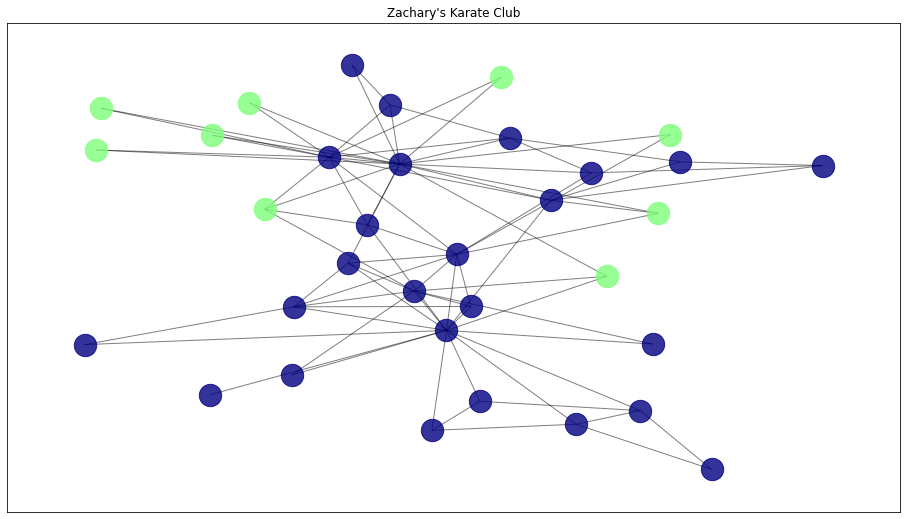

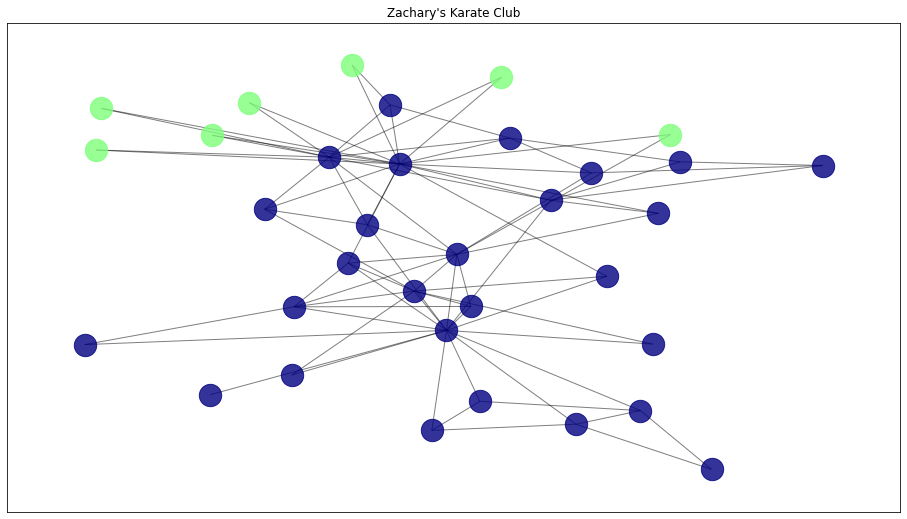

In [12]:
clusters = {0:[0],1:[1],2:[2],3:[3],4:[4],5:[5],6:[6],7:[7],8:[8],9:[9],10:[10],11:[11],12:[12],13:[13],14:[14],15:[15],16:[16],17:[17],18:[18],19:[19],20:[20],21:[21],22:[22],23:[23],24:[24],25:[25],26:[26],27:[27],28:[28],29:[29],30:[30],31:[31],32:[32],33:[33]}
RWG = randomwalk(G,2)
for i in range(31):
  clusters = optimize(clusters,RWG,degs)
  #draw_communities(saved_G,getcolors(clusters),pos) drawing it
  #print("here",i,"->",criterion_tests(orig_mat,clusters)) #Q here
draw_communities(saved_G,getcolors(clusters),pos)

clusters = {0:[0],1:[1],2:[2],3:[3],4:[4],5:[5],6:[6],7:[7],8:[8],9:[9],10:[10],11:[11],12:[12],13:[13],14:[14],15:[15],16:[16],17:[17],18:[18],19:[19],20:[20],21:[21],22:[22],23:[23],24:[24],25:[25],26:[26],27:[27],28:[28],29:[29],30:[30],31:[31],32:[32],33:[33]}
RWG = randomwalk(G,5)
for i in range(31):
  clusters = optimize(clusters,RWG,degs)
  #draw_communities(saved_G,getcolors(clusters),pos) drawing it
  #print("here",i,"->",criterion_tests(orig_mat,clusters)) #Q here
draw_communities(saved_G,getcolors(clusters),pos)